In [1]:
import requests
import time, sys, os, json
import threading

import matplotlib.pyplot as plt

## v2

In [3]:
headers = {'User-Agent': 'Mozilla/5.0'}
payload = {
    "periodLength": "5",
    "start_of_startDate": "2021-03-29",
    "start_of_endDate": "2021-04-15",
    "interval": "1",
}

session = requests.Session()
session.post('http://localhost:5000/usmap', headers=headers, data=payload)

<Response [200]>

In [4]:
def single_get(thread_num):
    start_time = time.time_ns() / 1000000
    
    headers = {'User-Agent': 'Mozilla/5.0'}
    payload = None
    if thread_num == 1:
        payload = {
            "periodLength": "3",
            "start_of_startDate": "2021-03-15",
            "start_of_endDate": "2021-03-19",
            "interval": "1",
        }
    elif thread_num == 2:
        payload = {
            "periodLength": "4",
            "start_of_startDate": "2021-03-29",
            "start_of_endDate": "2021-04-03",
            "interval": "1",
        }
    elif thread_num == 3:
        payload = {
            "periodLength": "5",
            "start_of_startDate": "2021-03-25",
            "start_of_endDate": "2021-04-01",
            "interval": "1",
        }
    else:
        payload = {
            "periodLength": "5",
            "start_of_startDate": "2021-03-05",
            "start_of_endDate": "2021-03-10",
            "interval": "1",
        }
        

    session = requests.Session()
    res = session.post('http://localhost:5000/usmap', headers=headers, data=payload)    
    end_time = time.time_ns() / 1000000
    print(f'Thread {thread_num}: start={round(start_time)}ms end={round(end_time)}ms delta={round(end_time - start_time)}ms', res)
          
single_get(1)

In [ ]:
threads = [
    threading.Thread(target=single_get, args=(i,))
    for i in range(4)]

for thread in threads:
    time.sleep(10e-5)
    thread.start()

# [thread.start() for thread in threads]
[thread.join() for thread in threads]

Thread 0: start=1635169949951ms end=1635169952252ms delta=2301ms <Response [200]>
Thread 1: start=1635169949954ms end=1635169952263ms delta=2310ms <Response [200]>
Thread 2: start=1635169949958ms end=1635169954553ms delta=4594ms <Response [200]>
Thread 3: start=1635169949966ms end=1635169957348ms delta=7382ms <Response [200]>


[None, None, None, None]

### Data

### Plotting

In [ ]:
import seaborn as sns
import pandas as pd

In [ ]:
l1 = 'summer revision, single-threaded, no lock'

d1 = """
1306
1416
1696
1567
1012
992
1322
1658
2107
2129
2111
2161
1002
1330
1645
1645
1941
1964
1988
2005
1857
1894
1919
1974
1049
1844
1862
1884
1343
1388
1724
1806
1998
2006
2007
2023
1506
1595
1874
1892"""

In [ ]:
l2 = 'summer revision, multithreaded, no lock'
d2 = """
1041
1560
1882
1755
1941
1648
1884
1888
1007
1707
1888
1897
1399
1537
1552
1711
1133
1611
1829
1866
1210
1245
1711
1719
1304
1429
1494
1860
1416
1674
1723
1800
8205
8330
8475
8555
1555
1556
1874
1946"""

In [ ]:
l3 = 'summer revision, multithreaded, with lock'

d3 = """
1196
1770
1717
1643
1470
1483
3620
3853
1502
1713
1783
1850
1171
1619
1897
1922
1856
2023
2123
2161
917
1270
1937
1949
1481
1552
1681
1739
1226
1482
1743
1767
1414
1581
1658
1974
1393
1690
1948
1961"""

In [ ]:
l4 = 'october revision, multithreaded, with lock'

d4 = """
1538
1566
1533
1461
899
1242
1331
1340
1240
1426
1414
1547
824
1120
1260
1361
1103
1188
1250
1362
1333
1409
1604
1661
1086
1157
1172
1187
940
946
1340
1670
942
1370
1540
1591
1114
1358
1412
1491"""

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

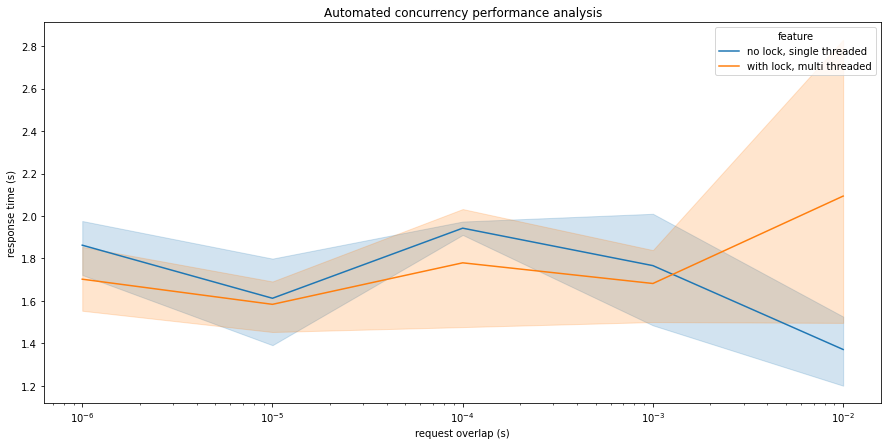

In [ ]:
def to_data(l, d):
    d = d.strip()
    d = d.split('\n')
    d = np.array(d)
    d = d.astype(float)
    d = d[:, None] + np.zeros((1,3))
    d[:, 0] = np.arange(0, 8*5, 1) // 8
    d[:, 0] = 10 ** -(2+d[:, 0])
    d = d.astype('O')
    d[:, 2] = l
    
    return d

data = np.concatenate([
    to_data(l, d)
    for l, d in 
    [
        ('no lock, single threaded', d1), 
        #(l2, d2), 
        #(l3, d3), 
        ('with lock, multi threaded', d3)
    ]
], axis=0)
data[:,1] = data[:,1] / 1000
    
df = pd.DataFrame(data, columns=['request overlap (s)', 'response time (s)', 'feature'])
df["request overlap (s)"] = pd.to_numeric(df["request overlap (s)"], downcast="float")
df["response time (s)"] = pd.to_numeric(df["response time (s)"], downcast="float")

plt.figure(figsize=(15, 7))
sns.lineplot(
    x='request overlap (s)', 
    y='response time (s)', 
    data=df, hue='feature')

sns.set_style("whitegrid")
plt.xscale('log')
plt.title('Automated concurrency performance analysis')
plt.xlabel('request overlap (s)')
plt.ylabel('response time (s)')
plt.show()

## randomized v2 test

In [ ]:
import random
import queue
import numpy as np
import pandas as pd
random.seed(0)

### Instrumentation

In [ ]:
q = queue.Queue()

In [ ]:
def random_get(thread_num):
    
    global q
    
    start_time = time.time_ns() / (10**9)
    
    payload = {
        "periodLength": f"{random.randint(2,8)}",
        "start_of_startDate": f"2021-03-{random.randint(1,15)}",
        "start_of_endDate": f"2021-03-{random.randint(15,30)}",
        "interval": "1",
    }
    with requests.Session() as s:
        response = s.post('http://localhost:5000/usmap', data=payload)
        
    end_time = time.time_ns() / (10**9)
    delta_time = end_time - start_time
    
    q.put(delta_time)
    #print(f'Thread {thread_num}: start={round(start_time)}ms end={round(end_time)}ms delta={round(delta_time)}ms', response)
    print(f'Thread %d: start=%6.6is end=%6.6is delta=%4es' %
         (thread_num, start_time, end_time, delta_time))

    
random_get(0)

Thread 0: start=1635892578s end=1635892582s delta=3.711848e+00s


In [ ]:
while not q.empty():
    q.get()

delays = 10**np.arange(start=-6., stop=1.5, step=0.5)
data = list()

for delay in delays:
    print(f'delay: {delay}s')
    
    threads = [
        threading.Thread(target=random_get, args=(i,))
        for i in range(4)]

    for thread in threads:
        time.sleep(delay)
        thread.start()
    
    for thread in threads:
        thread.join()
        data.append([delay, q.get()])
        
df = pd.DataFrame(data)
df

delay: 1e-06s
Thread 2: start=1635648506s end=1635648518s delta=1.203954e+01s
Thread 0: start=1635648506s end=1635648524s delta=1.852040e+01s
Thread 3: start=1635648506s end=1635648532s delta=2.578985e+01s
Thread 1: start=1635648506s end=1635648539s delta=3.288261e+01s
delay: 3.162277660168379e-06s
Thread 3: start=1635648539s end=1635648546s delta=7.428790e+00s
Thread 0: start=1635648539s end=1635648555s delta=1.583818e+01s
Thread 1: start=1635648539s end=1635648562s delta=2.302127e+01s
Thread 2: start=1635648539s end=1635648570s delta=3.142819e+01s
delay: 1e-05s
Thread 2: start=1635648570s end=1635648578s delta=7.786586e+00s
Thread 0: start=1635648570s end=1635648585s delta=1.496328e+01s
Thread 1: start=1635648570s end=1635648592s delta=2.214139e+01s
Thread 3: start=1635648570s end=1635648599s delta=2.916542e+01s
delay: 3.1622776601683795e-05s
Thread 0: start=1635648599s end=1635648600s delta=6.934090e-01s
Thread 1: start=1635648599s end=1635648607s delta=7.725687e+00s
Thread 2: start

,0,1
0,0.000001,12.039541
1,0.000001,18.520404
2,0.000001,25.789852
3,0.000001,32.882608
4,0.000003,7.428790
5,0.000003,15.838179
6,0.000003,23.021265
7,0.000003,31.428193
8,0.000010,7.786586
9,0.000010,14.963282


In [ ]:
df = pd.DataFrame(data)
df

,0,1
0,0.000001,7.308413
1,0.000001,14.812343
2,0.000001,21.390250
3,0.000001,28.661295
4,0.000010,7.073065
5,0.000010,14.070812
6,0.000010,21.283105
7,0.000010,29.060842


### Saving multithreaded

In [ ]:
data_multithreaded = np.array(data)
display(data_multithreaded)
data_multithreaded.tofile('./multithreaded.numpy')

array([[1.00000000e-06, 1.20395405e+01],
       [1.00000000e-06, 1.85204036e+01],
       [1.00000000e-06, 2.57898519e+01],
       [1.00000000e-06, 3.28826084e+01],
       [3.16227766e-06, 7.42879009e+00],
       [3.16227766e-06, 1.58381789e+01],
       [3.16227766e-06, 2.30212653e+01],
       [3.16227766e-06, 3.14281926e+01],
       [1.00000000e-05, 7.78658557e+00],
       [1.00000000e-05, 1.49632823e+01],
       [1.00000000e-05, 2.21413865e+01],
       [1.00000000e-05, 2.91654222e+01],
       [3.16227766e-05, 6.93408966e-01],
       [3.16227766e-05, 7.72568727e+00],
       [3.16227766e-05, 1.46872129e+01],
       [3.16227766e-05, 2.19078021e+01],
       [1.00000000e-04, 7.42591310e+00],
       [1.00000000e-04, 1.46331851e+01],
       [1.00000000e-04, 2.15925190e+01],
       [1.00000000e-04, 2.86127460e+01],
       [3.16227766e-04, 7.65696931e+00],
       [3.16227766e-04, 1.49305995e+01],
       [3.16227766e-04, 2.24099891e+01],
       [3.16227766e-04, 2.95936539e+01],
       [1.000000

In [ ]:
with open('multithreaded.bytes', 'wb') as f:
    f.write(data_multithreaded.tobytes())

In [ ]:
!od multithreaded.bytes

0000000 166615 120265 143367 037260 000000 030000 127512 040031
0000020 166615 120265 143367 037260 000000 110000 020126 040040
0000040 166615 120265 143367 037260 000000 060000 015631 040040
0000060 166615 120265 143367 037260 000000 054000 030572 040042
0000100 166615 120265 143367 037260 000000 140000 170447 040047
0000120 166615 120265 143367 037260 000000 160000 124613 040051
0000140 166615 120265 143367 037260 000000 014000 101626 040052
0000160 166615 120265 143367 037260 000000 024000 107601 040056
0000200 166615 120265 143367 037260 000000 054000 026172 040060
0000220 166615 120265 143367 037260 000000 104000 076427 040061
0000240 014144 020367 017413 037265 000000 124000 012436 040055
0000260 014144 020367 017413 037265 000000 146000 006067 040062
0000300 014144 020367 017413 037265 000000 032000 043517 040063
0000320 014144 020367 017413 037265 000000 162000 075456 040063
0000340 014144 020367 017413 037265 000000 140000 106610 040063
0000360 014144 020367 017413 037265 0000

### Saving singlethreaded

In [ ]:
data_singlethreaded = np.array(data)
display(data_singlethreaded)
data_singlethreaded.tofile('./singlethreaded.numpy')

array([[1.00000000e-06, 5.19227982e-02],
       [1.00000000e-06, 9.46648121e-02],
       [1.00000000e-06, 1.30814314e-01],
       [1.00000000e-06, 1.71093464e-01],
       [3.16227766e-06, 4.69617844e-02],
       [3.16227766e-06, 8.22608471e-02],
       [3.16227766e-06, 1.24747276e-01],
       [3.16227766e-06, 2.47972965e-01],
       [1.00000000e-05, 1.03118658e-01],
       [1.00000000e-05, 1.84482098e-01],
       [1.00000000e-05, 2.50539064e-01],
       [1.00000000e-05, 2.86140680e-01],
       [3.16227766e-05, 5.44080734e-02],
       [3.16227766e-05, 8.19644928e-02],
       [3.16227766e-05, 1.23575449e-01],
       [3.16227766e-05, 1.58347607e-01],
       [1.00000000e-04, 5.56013584e-02],
       [1.00000000e-04, 1.02461815e-01],
       [1.00000000e-04, 1.50895596e-01],
       [1.00000000e-04, 1.91517591e-01],
       [3.16227766e-04, 4.33557034e-02],
       [3.16227766e-04, 8.46962929e-02],
       [3.16227766e-04, 1.23586655e-01],
       [3.16227766e-04, 1.60063982e-01],
       [1.000000

In [ ]:
with open('singlethreaded.bytes', 'wb') as f:
    f.write(data_singlethreaded.tobytes())

In [ ]:
!od singlethreaded.bytes

0000000 166615 120265 143367 037260 000000 100000 143154 037776
0000020 166615 120265 143367 037260 000000 040000 034334 040015
0000040 166615 120265 143367 037260 000000 010000 171402 040024
0000060 166615 120265 143367 037260 000000 110000 172135 040033
0000100 166615 120265 143367 037260 000000 070000 026737 040041
0000120 166615 120265 143367 037260 000000 100000 176172 040044
0000140 166615 120265 143367 037260 000000 014000 115456 040050
0000160 166615 120265 143367 037260 000000 154000 003616 040054
0000200 166615 120265 143367 037260 000000 004000 121534 040057
0000220 166615 120265 143367 037260 000000 104000 073552 040061
0000240 014144 020367 017413 037265 000000 000000 006621 037773
0000260 014144 020367 017413 037265 000000 020000 127137 040012
0000300 014144 020367 017413 037265 000000 160000 154756 040023
0000320 014144 020367 017413 037265 000000 150000 171442 040031
0000340 014144 020367 017413 037265 000000 030000 024013 040040
0000360 014144 020367 017413 037265 0000

### Graphing v2 again

In [ ]:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_multithreaded = data_multithreaded[:8]

,request overlap (s),response time (s),execution mode
0,0.000001,0.051923,single-threaded
1,0.000001,0.094665,single-threaded
2,0.000001,0.130814,single-threaded
3,0.000001,0.171093,single-threaded
4,0.000003,0.046962,single-threaded
...,...,...,...
115,3.162278,19.024128,multithreaded
116,10.000000,6.595626,multithreaded
117,10.000000,6.928592,multithreaded
118,10.000000,6.569659,multithreaded


'population means'

request overlap (s)    0.974983
response time (s)      8.730204
dtype: float64

'single-threaded mean response time (s): 2.239746069908142'

'multithreaded mean response time (s): 15.220661123593649'

'improvement (single - multi)/single: -579%'

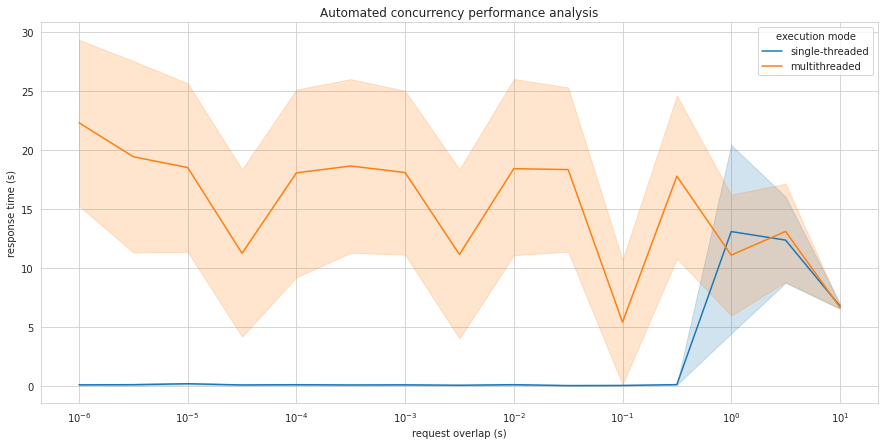

In [ ]:
assert all(data_multithreaded[:,0] == data_singlethreaded[:,0]), \
    'timescales do not match'

data_combined = []
for row in data_singlethreaded:
     data_combined.append((row[0], row[1], 'single-threaded'))
for row in data_multithreaded:
     data_combined.append((row[0], row[1], 'multithreaded'))

df = pd.DataFrame(data_combined)
df.columns = ['request overlap (s)',
              'response time (s)',
              'execution mode']

display(df)

display('population means')
display(df.mean(axis=0))

singlethreaded_mean = data_singlethreaded[:,1].mean()
multithreaded_mean = data_multithreaded[:,1].mean()
improvement = (singlethreaded_mean - multithreaded_mean) / singlethreaded_mean
display(f'single-threaded mean response time (s): {singlethreaded_mean}')
display(f'multithreaded mean response time (s): {multithreaded_mean}')
display('improvement (single - multi)/single: %d' % (improvement*100) + '%')

plt.figure(figsize=(15, 7))
sns.lineplot(x='request overlap (s)', 
             y='response time (s)',
             hue='execution mode',
             data=df)

sns.set_style("whitegrid")
plt.xscale('log')
plt.title('Automated concurrency performance analysis')
plt.xlabel('request overlap (s)')
plt.ylabel('response time (s)')
plt.show()

## identicle request v2 test

In [2]:
import random
import queue
import numpy as np
import pandas as pd
random.seed(10)

### Instrumentation

In [3]:
q = queue.Queue()

In [4]:
def random_get(thread_num, payload):
    
    global q
    
    start_time = time.time_ns() / (10**9)
    
    with requests.Session() as s:
        response = s.post('http://localhost:5000/usmap', data=payload)
        
    end_time = time.time_ns() / (10**9)
    delta_time = end_time - start_time
    
    q.put(delta_time)
    #print(f'Thread {thread_num}: start={round(start_time)}ms end={round(end_time)}ms delta={round(delta_time)}ms', response)
    print(f'Thread %d: start=%6.6fs end=%6.6fs delta=%4es' %
         (thread_num, start_time, end_time, delta_time))

def get_payload():
    return {
        "periodLength": f"{random.randint(2,8)}",
        "start_of_startDate": f"2021-03-{random.randint(1,15)}",
        "start_of_endDate": f"2021-03-{random.randint(15,30)}",
        "interval": "1",
    }
    
random_get(0, payload=get_payload())

Thread 0: start=1636731352.644388s end=1636731372.097788s delta=1.945340e+01s


In [5]:
while not q.empty():
    q.get()

delays = 10**np.arange(start=-6., stop=-3., step=1.0)
data = list()

for delay in delays:
    print(f'delay: {delay}s')
    
    payload = get_payload()
    threads = [
        threading.Thread(target=random_get, args=(i, payload))
        for i in range(4)]

    for thread in threads:
        time.sleep(delay)
        thread.start()
    
    for thread in threads:
        thread.join()
        data.append([delay, q.get()])
        
df = pd.DataFrame(data)
df

delay: 1e-06s
Thread 0: start=1636731378.712167s end=1636731391.945934s delta=1.323377e+01s
Thread 1: start=1636731378.715143s end=1636731391.970010s delta=1.325487e+01s
Thread 2: start=1636731378.730135s end=1636731392.018765s delta=1.328863e+01s
Thread 3: start=1636731378.730672s end=1636731392.061474s delta=1.333080e+01s
delay: 1e-05s
Thread 2: start=1636731392.065950s end=1636731404.956441s delta=1.289049e+01s
Thread 0: start=1636731392.062516s end=1636731404.982349s delta=1.291983e+01s
Thread 1: start=1636731392.065513s end=1636731405.025870s delta=1.296036e+01s
Thread 3: start=1636731392.068673s end=1636731405.041156s delta=1.297248e+01s
delay: 0.0001s
Thread 0: start=1636731405.043914s end=1636731418.037746s delta=1.299383e+01s
Thread 3: start=1636731405.064343s end=1636731418.069152s delta=1.300481e+01s
Thread 1: start=1636731405.051370s end=1636731418.100116s delta=1.304875e+01s
Thread 2: start=1636731405.061260s end=1636731418.128440s delta=1.306718e+01s


,0,1
0,0.000001,13.233768
1,0.000001,13.254867
2,0.000001,13.288630
3,0.000001,13.330802
4,0.000010,12.890491
5,0.000010,12.919833
6,0.000010,12.960357
7,0.000010,12.972483
8,0.000100,12.993832
9,0.000100,13.004808


,request overlap (s),response time (s)
0,0.000001,13.233768
1,0.000001,13.254867
2,0.000001,13.288630
3,0.000001,13.330802
4,0.000010,12.890491
5,0.000010,12.919833
6,0.000010,12.960357
7,0.000010,12.972483
8,0.000100,12.993832
9,0.000100,13.004808


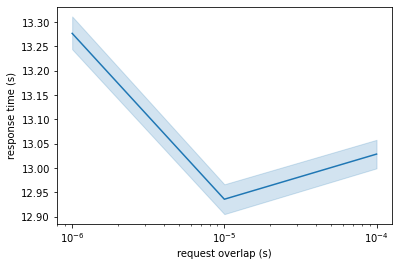

In [11]:
import seaborn as sns
df = pd.DataFrame(data)
df.columns = ['request overlap (s)',
              'response time (s)']
display(df)
sns.lineplot(x='request overlap (s)', 
              y='response time (s)',
              data=df)
plt.xscale('log'),
plt.show()

### Saving multithreaded

In [28]:
data_multithreaded = np.array(data)
display(data_multithreaded)
data_multithreaded.tofile('./multithreaded.numpy')

array([[1.00000000e-06, 7.47358251e+00],
       [1.00000000e-06, 8.17686200e+00],
       [1.00000000e-06, 8.99423933e+00],
       [1.00000000e-06, 9.81079936e+00],
       [1.00000000e-05, 6.84217668e+00],
       [1.00000000e-05, 7.61418176e+00],
       [1.00000000e-05, 8.42483115e+00],
       [1.00000000e-05, 9.22151518e+00],
       [1.00000000e-04, 6.77216792e+00],
       [1.00000000e-04, 7.57203078e+00],
       [1.00000000e-04, 8.38528252e+00],
       [1.00000000e-04, 9.16900921e+00],
       [1.00000000e-03, 7.15765023e+00],
       [1.00000000e-03, 8.02341723e+00],
       [1.00000000e-03, 9.26355672e+00],
       [1.00000000e-03, 1.01231563e+01],
       [1.00000000e-02, 7.05049706e+00],
       [1.00000000e-02, 7.85462189e+00],
       [1.00000000e-02, 8.66698408e+00],
       [1.00000000e-02, 9.48973417e+00],
       [1.00000000e-01, 7.22782040e+00],
       [1.00000000e-01, 7.94079304e+00],
       [1.00000000e-01, 8.65680218e+00],
       [1.00000000e-01, 9.36724687e+00],
       [1.000000

In [ ]:
with open('multithreaded.bytes', 'wb') as f:
    f.write(data_multithreaded.tobytes())

In [ ]:
!od multithreaded.bytes

0000000 166615 120265 143367 037260 000000 030000 127512 040031
0000020 166615 120265 143367 037260 000000 110000 020126 040040
0000040 166615 120265 143367 037260 000000 060000 015631 040040
0000060 166615 120265 143367 037260 000000 054000 030572 040042
0000100 166615 120265 143367 037260 000000 140000 170447 040047
0000120 166615 120265 143367 037260 000000 160000 124613 040051
0000140 166615 120265 143367 037260 000000 014000 101626 040052
0000160 166615 120265 143367 037260 000000 024000 107601 040056
0000200 166615 120265 143367 037260 000000 054000 026172 040060
0000220 166615 120265 143367 037260 000000 104000 076427 040061
0000240 014144 020367 017413 037265 000000 124000 012436 040055
0000260 014144 020367 017413 037265 000000 146000 006067 040062
0000300 014144 020367 017413 037265 000000 032000 043517 040063
0000320 014144 020367 017413 037265 000000 162000 075456 040063
0000340 014144 020367 017413 037265 000000 140000 106610 040063
0000360 014144 020367 017413 037265 0000

### Saving singlethreaded

In [30]:
data_singlethreaded = np.array(data)
display(data_singlethreaded)
data_singlethreaded.tofile('./singlethreaded.numpy')

array([[1.00000000e-06, 1.69572270e+01],
       [1.00000000e-06, 1.69922936e+01],
       [1.00000000e-06, 1.70398796e+01],
       [1.00000000e-06, 1.70693843e+01],
       [1.00000000e-05, 6.75622940e+00],
       [1.00000000e-05, 6.80110812e+00],
       [1.00000000e-05, 6.83163381e+00],
       [1.00000000e-05, 6.84594870e+00],
       [1.00000000e-04, 6.55030537e+00],
       [1.00000000e-04, 6.60497189e+00],
       [1.00000000e-04, 6.63219476e+00],
       [1.00000000e-04, 6.64490485e+00],
       [1.00000000e-03, 6.88582230e+00],
       [1.00000000e-03, 6.94113636e+00],
       [1.00000000e-03, 6.97832680e+00],
       [1.00000000e-03, 7.01467538e+00],
       [1.00000000e-02, 6.76964283e+00],
       [1.00000000e-02, 6.80567598e+00],
       [1.00000000e-02, 6.84732223e+00],
       [1.00000000e-02, 6.88230157e+00],
       [1.00000000e-01, 7.57228827e+00],
       [1.00000000e-01, 7.52227759e+00],
       [1.00000000e-01, 7.47104430e+00],
       [1.00000000e-01, 7.40800524e+00],
       [1.000000

In [ ]:
with open('singlethreaded.bytes', 'wb') as f:
    f.write(data_singlethreaded.tobytes())

In [ ]:
!od singlethreaded.bytes

0000000 166615 120265 143367 037260 000000 100000 143154 037776
0000020 166615 120265 143367 037260 000000 040000 034334 040015
0000040 166615 120265 143367 037260 000000 010000 171402 040024
0000060 166615 120265 143367 037260 000000 110000 172135 040033
0000100 166615 120265 143367 037260 000000 070000 026737 040041
0000120 166615 120265 143367 037260 000000 100000 176172 040044
0000140 166615 120265 143367 037260 000000 014000 115456 040050
0000160 166615 120265 143367 037260 000000 154000 003616 040054
0000200 166615 120265 143367 037260 000000 004000 121534 040057
0000220 166615 120265 143367 037260 000000 104000 073552 040061
0000240 014144 020367 017413 037265 000000 000000 006621 037773
0000260 014144 020367 017413 037265 000000 020000 127137 040012
0000300 014144 020367 017413 037265 000000 160000 154756 040023
0000320 014144 020367 017413 037265 000000 150000 171442 040031
0000340 014144 020367 017413 037265 000000 030000 024013 040040
0000360 014144 020367 017413 037265 0000

### Graphing v2 again

In [23]:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
data_singlethreaded = data_singlethreaded[:data_multithreaded.shape[0]]

In [ ]:
data_singlethreaded = data_singlethreaded[:455]

,request overlap (s),response time (s),execution mode
0,0.000001,16.957227,single-threaded
1,0.000001,16.992294,single-threaded
2,0.000001,17.039880,single-threaded
3,0.000001,17.069384,single-threaded
4,0.000010,6.756229,single-threaded
5,0.000010,6.801108,single-threaded
6,0.000010,6.831634,single-threaded
7,0.000010,6.845949,single-threaded
8,0.000100,6.550305,single-threaded
9,0.000100,6.604972,single-threaded


'population means'

request overlap (s)    0.158730
response time (s)      7.968207
dtype: float64

'single-threaded mean response time (s): 8.125676487173353'

'multithreaded mean response time (s): 7.810736792428153'

'improvement (single - multi)/single: 3%'

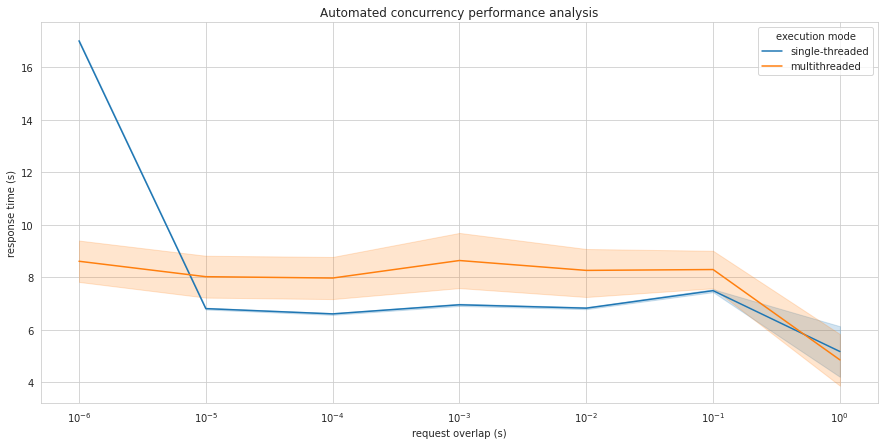

In [31]:
assert all(data_multithreaded[:,0] == data_singlethreaded[:,0]), \
    'timescales do not match'

data_combined = []
for row in data_singlethreaded:
     data_combined.append((row[0], row[1], 'single-threaded'))
for row in data_multithreaded:
     data_combined.append((row[0], row[1], 'multithreaded'))

df = pd.DataFrame(data_combined)
df.columns = ['request overlap (s)',
              'response time (s)',
              'execution mode']

display(df)

display('population means')
display(df.mean(axis=0))

singlethreaded_mean = data_singlethreaded[:,1].mean()
multithreaded_mean = data_multithreaded[:,1].mean()
improvement = (singlethreaded_mean - multithreaded_mean) / singlethreaded_mean
display(f'single-threaded mean response time (s): {singlethreaded_mean}')
display(f'multithreaded mean response time (s): {multithreaded_mean}')
display('improvement (single - multi)/single: %d' % (improvement*100) + '%')

plt.figure(figsize=(15, 7))
sns.lineplot(x='request overlap (s)', 
             y='response time (s)',
             hue='execution mode',
             data=df)

sns.set_style("whitegrid")
plt.xscale('log')
plt.title('Automated concurrency performance analysis')
plt.xlabel('request overlap (s)')
plt.ylabel('response time (s)')
plt.show()

## v3

In [6]:
import requests

# ('Connecticut', 'Connecticut'), ('District of Columbia', 'District of Columbia'), ('Oregon', 'Oregon'), 
# ('Michigan', 'Michigan'), ('Wyoming', 'Wyoming')
headers = {'User-Agent': 'Mozilla/5.0'}
payload = {'Colorado':'Colorado',
           'District of Columbia':'District of Columbia',
           'Oregon':'Oregon',
           'Wyoming':'Wyoming',
           'Michigan':'Michigan',
           'feature1':'new_tests',
           'feature2':'new_death'}

session = requests.Session()
session.post('http://localhost:8000/animate',params=dict(src='US'), headers=headers,data=payload)

<Response [200]>

In [8]:
def single_get(thread_num, port):
    start_time = time.time_ns() / 1000000
    
    headers = {'User-Agent': 'Mozilla/5.0'}
    payload = None
    if thread_num == 1:
        payload = {'Colorado':'Colorado','feature1':'new_tests','feature2':'new_death'}
    elif thread_num == 2:
        payload = {'Colorado':'Colorado',
           'District of Columbia':'District of Columbia',
           'Wyoming':'Wyoming',
           'Michigan':'Michigan',
           'feature1':'new_tests',
           'feature2':'new_death'}
    elif thread_num == 3:
        payload = {'Colorado':'Colorado',
           'District of Columbia':'District of Columbia',
           'Oregon':'Oregon',
           'feature1':'new_tests',
           'feature2':'new_death'}
    else:
        payload = {'Colorado':'Colorado',
           'District of Columbia':'District of Columbia',
           'Oregon':'Oregon',
           'Michigan':'Michigan',
           'feature1':'new_tests',
           'feature2':'new_death'}
        

    session = requests.Session()
    print(session.post(f'http://localhost:{port}/animate',params=dict(src='US'), headers=headers,data=payload))
    
    end_time = time.time_ns() / 1000000
    print(f'Thread {thread_num}: start={round(start_time)}ms end={round(end_time)}ms delta={round(end_time - start_time)}ms')
          
single_get(1, port=8000)

<Response [200]>
Thread 1: start=1628624455971ms end=1628624460010ms delta=4038ms


In [12]:
threads = [
    threading.Thread(target=single_get, args=(i, 8000))
    for i in range(4)]

for thread in threads:
    time.sleep(10e-6)
    thread.start()

# [thread.start() for thread in threads]
[thread.join() for thread in threads]

<Response [200]>
Thread 0: start=1628624774352ms end=1628624797509ms delta=23157ms
<Response [200]>
Thread 1: start=1628624774354ms end=1628624800497ms delta=26143ms


Exception in thread Thread-15:
Traceback (most recent call last):
  File "/home/jacob/anaconda3/envs/ai/lib/python3.8/site-packages/urllib3/connectionpool.py", line 699, in urlopen
    httplib_response = self._make_request(
  File "/home/jacob/anaconda3/envs/ai/lib/python3.8/site-packages/urllib3/connectionpool.py", line 445, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/home/jacob/anaconda3/envs/ai/lib/python3.8/site-packages/urllib3/connectionpool.py", line 440, in _make_request
    httplib_response = conn.getresponse()
  File "/home/jacob/anaconda3/envs/ai/lib/python3.8/http/client.py", line 1347, in getresponse
    response.begin()
  File "/home/jacob/anaconda3/envs/ai/lib/python3.8/http/client.py", line 307, in begin
    Exception in thread Thread-14:
Traceback (most recent call last):
  File "/home/jacob/anaconda3/envs/ai/lib/python3.8/site-packages/urllib3/connectionpool.py", line 699, in urlopen
    httplib_response = self._make_

[None, None, None, None]

Working output should be similar to:

No delay
```
<Response [200]>
Thread 0: start=1628257731700ms end=1628257756448ms delta=24748ms
<Response [200]>
Thread 2: start=1628257731713ms end=1628257760961ms delta=29248ms
<Response [200]>
Thread 1: start=1628257731705ms end=1628257763744ms delta=32040ms
<Response [200]>
Thread 3: start=1628257731717ms end=1628257776213ms delta=44496ms
```

`1e-4` delay:

```
<Response [200]>
Thread 2: start=1628624464669ms end=1628624487382ms delta=22713ms
<Response [200]>
Thread 3: start=1628624464675ms end=1628624505041ms delta=40366ms
<Response [200]>
Thread 1: start=1628624464666ms end=1628624521868ms delta=57202ms
<Response [200]>
Thread 0: start=1628624464663ms end=1628624538569ms delta=73906ms
```

`1e-5` delay

```
<Response [200]>
Thread 0: start=1628624584728ms end=1628624607491ms delta=22762ms
<Response [200]>
Thread 2: start=1628624584737ms end=1628624623982ms delta=39245ms
<Response [200]>
Thread 3: start=1628624584749ms end=1628624635170ms delta=50421ms
<Response [200]>
Thread 1: start=1628624584733ms end=1628624638238ms delta=53504ms
```

`1e-6` delay

```
<Response [200]>
Thread 0: start=1628624774352ms end=1628624797509ms delta=23157ms
<Response [200]>
Thread 1: start=1628624774354ms end=1628624800497ms delta=26143ms
[remaining threads hang and R console crashes]
```

when the output doesn't return all threads, the server console shows

```
R[write to console]: 
 *** caught segfault ***

R[write to console]: address 0x30, cause 'memory not mapped'

R[write to console]: 
Possible actions:
1: abort (with core dump, if enabled)
2: normal R exit
3: exit R without saving workspace
4: exit R saving workspace
```

## Graphs

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_theme(style="darkgrid")

In [43]:
def plot(cached, notcached):
    
    arr = []
    
    cached_data = [float(d) for d in cached.split()]
    notcached_data = [float(d) for d in notcached.split()]
    
    for i, d in enumerate(cached_data):
        arr += [[i%3, d, 'cached']]
    for i, d in enumerate(notcached_data):
        arr += [[i%3, d, 'not cached']]

    df = pd.DataFrame(arr, columns=['trial', 'load duration', 'was cached?'])

    sns.lineplot(x='trial', y='load duration',
                 hue='was cached?',  
                 data=df)
    
    mu_cached = sum(cached_data)/len(cached_data)
    mu_notcached = sum(notcached_data)/len(notcached_data)
    print(f"""mean {mu_cached} (cached) {mu_notcached} (notcached) 
              gain {mu_notcached / mu_cached}x or {(mu_cached - mu_notcached) / mu_notcached}%""")

mean 3.380000000000001 (cached) 5.620000000000001 (notcached) 
              gain 1.662721893491124x or -0.398576512455516%


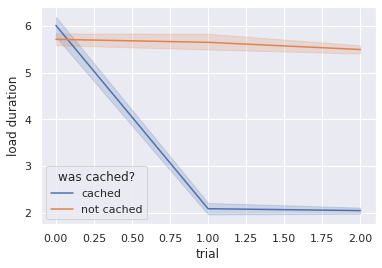

In [36]:
# single state
cached = """
6.18 2.06 2.14
6.25 2.30 2.10
5.58 2.19 1.93
6.13 1.94 2.06
5.92 1.93 1.99
"""

notcached = """
5.65 5.99 5.61
5.86 5.54 5.37
5.68 5.52 5.52
5.48 5.75 5.39
5.90 5.45 5.59
"""

plot(cached, notcached)

mean 4.970666666666667 (cached) 10.446666666666669 (notcached) 
              gain 2.1016630901287554x or -0.5241863433312062%


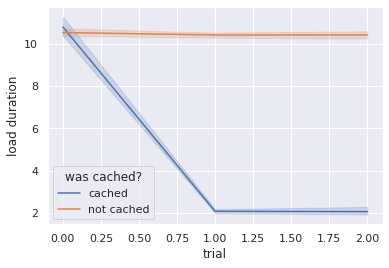

In [37]:
# two states
cached = """
10.99 2.26 2.49
10.56 1.92 1.96
10.39 2.09 1.93
11.69 2.00 1.90
10.29 2.09 2.00
"""

notcached = """
10.88 10.53 10.13
10.38 10.13 10.58
10.38 10.39 10.40
10.62 10.46 10.26
10.35 10.53 10.68
"""

plot(cached, notcached)

mean 11.756666666666668 (cached) 28.532222222222224 (notcached) 
              gain 2.4268972686891597x or -0.5879512442073289%


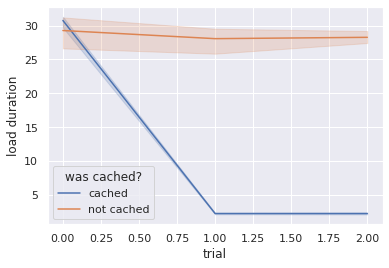

In [38]:
# five states
cached = """
31.25 2.35 2.40
31.30 2.15 2.25
29.69 2.29 2.13
"""

notcached = """
31.20 30.24 28.18
29.97 28.11 27.42
26.63 25.85 29.19
"""

plot(cached, notcached)

mean 22.456666666666667 (cached) 130.58666666666667 (notcached) 
              gain 5.815051209737272x or -0.8280324688584848%


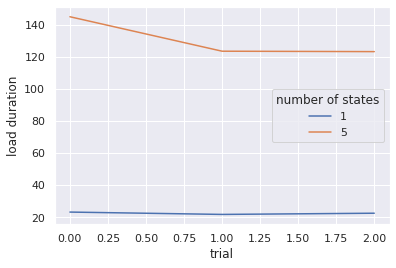

In [42]:
# two states
onestate = """
23.18 21.72 22.47
"""

fivestates = """
145 123.51 123.25
"""

plot(onestate, fivestates)